In [ ]:
!pip install librosa
#librosa.org

!pip install audio_utils

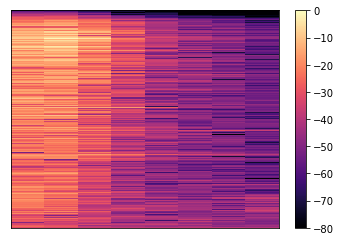

In [3]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt

#filename = librosa.example('nutcracker')

y, sr = librosa.load('/Users/cooky/HDD/Drum/9th Wonder Kit/Hi-Hats/Bld_H1.wav')

tempo, beat_frame = librosa.beat.beat_track(y=y, sr=sr)

D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()


In [8]:
from audio_utils import normalized, trim_data, loudness_at, loudness_of

def load_and_trim(file):
    y, rate = librosa.load(file, mono=True)
    

ImportError: cannot import name 'trim_data' from 'audio_utils' (/opt/homebrew/Caskroom/miniforge/base/envs/cookyflow/lib/python3.9/site-packages/audio_utils/__init__.py)

In [5]:
def features_for(file):
    # Load and trim the audio file to only the parts that aren't silent.
    audio, rate = load_and_trim(file)

    # Use poorly_estimate_fundamental to figure out what the rough
    # pitch is, along with the standard deviation - how much it varies.
    fundamental, f_stddev = poorly_estimate_fundamental(audio, rate)

    # Like an equalizer, find out how loud each "frequency band" is.
    # In this case, we're just splitting up the audio spectrum into
    # three very wide sections, low, mid, and high.
    low, mid, high = average_eq_bands(audio, 3)

    return {
        "duration":              librosa.get_duration(audio, rate),
        "start_loudness":        loudness_at(audio, 0),
        "mid_loudness":          loudness_at(audio, len(audio) / 2),
        "end_loudness":          loudness_at(audio, len(audio)),
        "fundamental_freq":      fundamental,
        "fundamental_deviation": f_stddev,
        "average_eq_low":        low,
        "average_eq_mid":        mid,
        "average_eq_high":       high,
    }